<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_2X/blob/main/GQtest_data(y_hat)_add_delta_(1_2)_n20_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
base_path = '/content/drive/My Drive/pattern_addition_2X/addition_delta_1.2'

In [5]:
os.listdir(base_path)

['data_add_delta_1.2_n250.csv',
 'data_add_delta_1.2_n120.csv',
 'data_add_delta_1.2_n60.csv',
 'data_add_delta_1.2_n30.csv',
 'data_add_delta_1.2_n20.csv']

In [6]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_1.2_n20.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,60.859282,71.117160,-4.108689,137.867753,140.224388,-2.356635
1,0.0,1.0,31.934170,86.485842,-7.987420,120.432592,126.327219,-5.894627
2,0.0,2.0,31.350719,41.738783,-6.005119,77.084383,82.775055,-5.690672
3,0.0,3.0,44.660788,79.590757,19.605364,153.856910,132.313946,21.542964
4,0.0,4.0,64.917856,49.330736,5.426303,129.674895,123.322115,6.352781
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,63.564558,97.455141,2.026324,173.046024,167.712346,5.333678
19996,999.0,16.0,34.088703,69.500230,-13.461134,100.127800,112.828010,-12.700210
19997,999.0,17.0,26.094950,20.635916,-4.984741,51.746125,54.330180,-2.584055
19998,999.0,18.0,91.065267,42.147262,-17.785169,125.427360,132.935099,-7.507739


In [7]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,60.859282,71.117160,-4.108689,137.867753,140.224388,-2.356635
1,0.0,1.0,31.934170,86.485842,-7.987420,120.432592,126.327219,-5.894627
2,0.0,2.0,31.350719,41.738783,-6.005119,77.084383,82.775055,-5.690672
3,0.0,3.0,44.660788,79.590757,19.605364,153.856910,132.313946,21.542964
4,0.0,4.0,64.917856,49.330736,5.426303,129.674895,123.322115,6.352781
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,63.564558,97.455141,2.026324,173.046024,167.712346,5.333678
19996,999.0,16.0,34.088703,69.500230,-13.461134,100.127800,112.828010,-12.700210
19997,999.0,17.0,26.094950,20.635916,-4.984741,51.746125,54.330180,-2.584055
19998,999.0,18.0,91.065267,42.147262,-17.785169,125.427360,132.935099,-7.507739


In [8]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2          e           Y       y_hat  \
rep   index                                                            
0.0   0.0    60.859282  71.117160  -4.108689  137.867753  140.224388   
      1.0    31.934170  86.485842  -7.987420  120.432592  126.327219   
      2.0    31.350719  41.738783  -6.005119   77.084383   82.775055   
      3.0    44.660788  79.590757  19.605364  153.856910  132.313946   
      4.0    64.917856  49.330736   5.426303  129.674895  123.322115   
...                ...        ...        ...         ...         ...   
999.0 15.0   63.564558  97.455141   2.026324  173.046024  167.712346   
      16.0   34.088703  69.500230 -13.461134  100.127800  112.828010   
      17.0   26.094950  20.635916  -4.984741   51.746125   54.330180   
      18.0   91.065267  42.147262 -17.785169  125.427360  132.935099   
      19.0   56.583444  28.630340 -13.338470   81.875314   88.998243   

                 e_hat  
rep   index             
0.0   0.0    -2.356635  
      1.0    -5.894627  
      2.0    -5.690672  
      3.0    21.542964  
      4.0     6.352781  
...                ...  
999.0 15.0    5.333678  
      16.0  -12.700210  
      17.0   -2.584055  
      18.0   -7.507739  
      19.0   -7.122929  

[20000 rows x 6 columns]

In [9]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2          e           Y       y_hat  \
rep   index                                                            
0.0   0.0    60.859282  71.117160  -4.108689  137.867753  140.224388   
      1.0    31.934170  86.485842  -7.987420  120.432592  126.327219   
      2.0    31.350719  41.738783  -6.005119   77.084383   82.775055   
      3.0    44.660788  79.590757  19.605364  153.856910  132.313946   
      4.0    64.917856  49.330736   5.426303  129.674895  123.322115   
...                ...        ...        ...         ...         ...   
999.0 15.0   63.564558  97.455141   2.026324  173.046024  167.712346   
      16.0   34.088703  69.500230 -13.461134  100.127800  112.828010   
      17.0   26.094950  20.635916  -4.984741   51.746125   54.330180   
      18.0   91.065267  42.147262 -17.785169  125.427360  132.935099   
      19.0   56.583444  28.630340 -13.338470   81.875314   88.998243   

                 e_hat  
rep   index             
0.0   0.0    -2.356635  
      1.0    -5.894627  
      2.0    -5.690672  
      3.0    21.542964  
      4.0     6.352781  
...                ...  
999.0 15.0    5.333678  
      16.0  -12.700210  
      17.0   -2.584055  
      18.0   -7.507739  
      19.0   -7.122929  

[20000 rows x 6 columns]

In [10]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,60.859282,71.117160,-4.108689,137.867753,140.224388,-2.356635
1,0.0,1.0,31.934170,86.485842,-7.987420,120.432592,126.327219,-5.894627
2,0.0,2.0,31.350719,41.738783,-6.005119,77.084383,82.775055,-5.690672
3,0.0,3.0,44.660788,79.590757,19.605364,153.856910,132.313946,21.542964
4,0.0,4.0,64.917856,49.330736,5.426303,129.674895,123.322115,6.352781
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,63.564558,97.455141,2.026324,173.046024,167.712346,5.333678
19996,999.0,16.0,34.088703,69.500230,-13.461134,100.127800,112.828010,-12.700210
19997,999.0,17.0,26.094950,20.635916,-4.984741,51.746125,54.330180,-2.584055
19998,999.0,18.0,91.065267,42.147262,-17.785169,125.427360,132.935099,-7.507739


In [11]:
table.set_index(['rep', 'index'], inplace=True)

In [12]:
table

x1         x2          e           Y       y_hat  \
rep   index                                                            
0.0   0.0    60.859282  71.117160  -4.108689  137.867753  140.224388   
      1.0    31.934170  86.485842  -7.987420  120.432592  126.327219   
      2.0    31.350719  41.738783  -6.005119   77.084383   82.775055   
      3.0    44.660788  79.590757  19.605364  153.856910  132.313946   
      4.0    64.917856  49.330736   5.426303  129.674895  123.322115   
...                ...        ...        ...         ...         ...   
999.0 15.0   63.564558  97.455141   2.026324  173.046024  167.712346   
      16.0   34.088703  69.500230 -13.461134  100.127800  112.828010   
      17.0   26.094950  20.635916  -4.984741   51.746125   54.330180   
      18.0   91.065267  42.147262 -17.785169  125.427360  132.935099   
      19.0   56.583444  28.630340 -13.338470   81.875314   88.998243   

                 e_hat  
rep   index             
0.0   0.0    -2.356635  
      1.0    -5.894627  
      2.0    -5.690672  
      3.0    21.542964  
      4.0     6.352781  
...                ...  
999.0 15.0    5.333678  
      16.0  -12.700210  
      17.0   -2.584055  
      18.0   -7.507739  
      19.0   -7.122929  

[20000 rows x 6 columns]

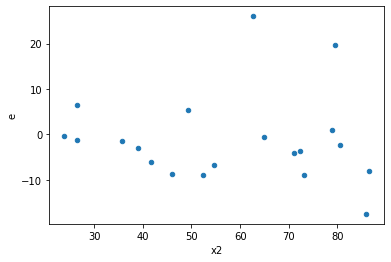

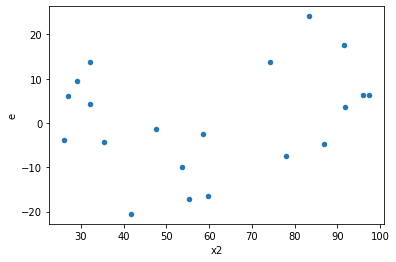

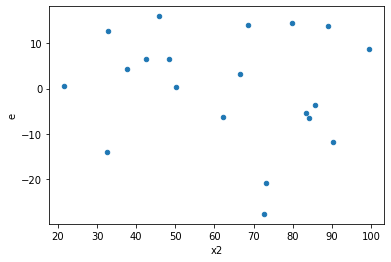

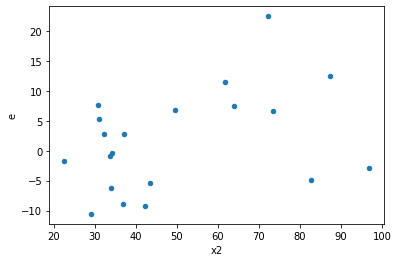

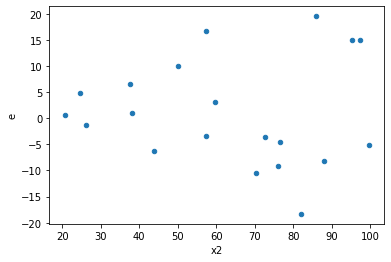

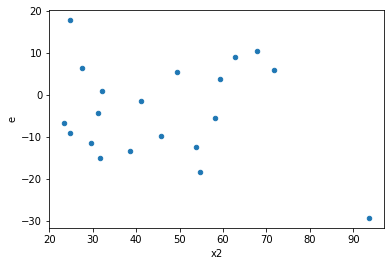

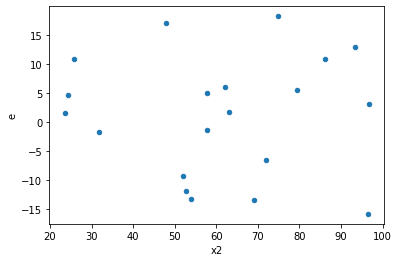

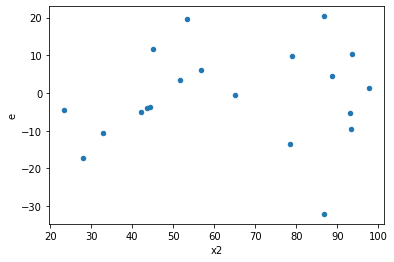

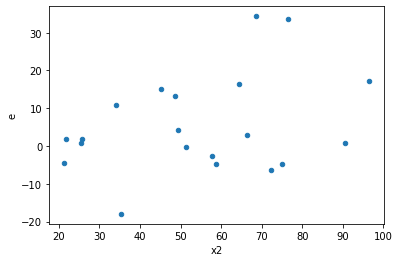

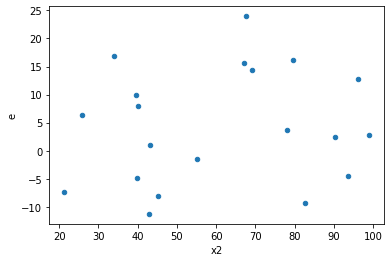

In [13]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [14]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,6.0,6.0,627.4618414256671,675.7617294934732,104.57697357094452,112.62695491557888,1.0769766141604136,0.9305726227367601,0.5347136886316199,0.46528631136838006,Reject005=1 : Homoscedasticity
3.0,6.0,6.0,167.23209279247567,449.05364246718807,27.872015465412613,74.84227374453134,2.685212120286235,0.25461427514195956,0.8726928624290202,0.12730713757097978,Reject005=1 : Homoscedasticity
4.0,6.0,6.0,251.50148731139856,594.0834063656132,41.91691455189976,99.01390106093554,2.3621466923177445,0.31939059213046384,0.8403047039347681,0.15969529606523192,Reject005=1 : Homoscedasticity
5.0,6.0,6.0,468.60185786198406,647.5817585010219,78.100309643664,107.93029308350366,1.3819444964551386,0.7044578968053701,0.647771051597315,0.35222894840268504,Reject005=1 : Homoscedasticity
6.0,6.0,6.0,321.38832601371405,939.4189507085441,53.56472100228567,156.56982511809068,2.9230027187373877,0.21751662029743613,0.8912416898512819,0.10875831014871806,Reject005=1 : Homoscedasticity
7.0,6.0,6.0,988.3905518469965,1506.1881023986834,164.73175864116607,251.03135039978056,1.5238795024740812,0.6218422488239845,0.6890788755880077,0.31092112441199227,Reject005=1 : Homoscedasticity
8.0,6.0,6.0,381.9363669845809,1184.7368695673342,63.65606116409682,197.45614492788903,3.1019221314820826,0.1941457541146021,0.902927122942699,0.09707287705730105,Reject005=1 : Homoscedasticity
9.0,6.0,6.0,474.95820530715747,476.7746279381743,79.15970088452625,79.46243798969572,1.0038243841473211,0.9964214913642586,0.5017892543178707,0.4982107456821293,Reject005=1 : Homoscedasticity
11.0,6.0,6.0,347.08134637706235,2496.9052672460043,57.846891062843724,416.15087787433407,7.194005939268818,0.030023121783440576,0.9849884391082797,0.015011560891720288,Reject005=0 : Heteroscedasticity


In [16]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,6.0,6.0,528.1445068896459,525.4639939551846,88.02408448160764,87.5773323258641,0.9949246600135115,0.9952297840603588,Reject005=1 : Homoscedasticity
1.0,6.0,6.0,627.4618414256671,675.7617294934732,104.57697357094452,112.62695491557888,1.0769766141604136,0.9305726227367601,Reject005=1 : Homoscedasticity
2.0,6.0,6.0,1030.1693934845582,464.3241889674611,171.69489891409305,77.38736482791019,0.45072605719422504,0.35501514331790673,Reject005=1 : Homoscedasticity
3.0,6.0,6.0,167.23209279247567,449.05364246718807,27.872015465412613,74.84227374453134,2.685212120286235,0.25461427514195956,Reject005=1 : Homoscedasticity
4.0,6.0,6.0,251.50148731139856,594.0834063656132,41.91691455189976,99.01390106093554,2.3621466923177445,0.31939059213046384,Reject005=1 : Homoscedasticity
5.0,6.0,6.0,468.60185786198406,647.5817585010219,78.100309643664,107.93029308350366,1.3819444964551386,0.7044578968053701,Reject005=1 : Homoscedasticity
6.0,6.0,6.0,321.38832601371405,939.4189507085441,53.56472100228567,156.56982511809068,2.9230027187373877,0.21751662029743613,Reject005=1 : Homoscedasticity
7.0,6.0,6.0,988.3905518469965,1506.1881023986834,164.73175864116607,251.03135039978056,1.5238795024740812,0.6218422488239845,Reject005=1 : Homoscedasticity
8.0,6.0,6.0,381.9363669845809,1184.7368695673342,63.65606116409682,197.45614492788903,3.1019221314820826,0.1941457541146021,Reject005=1 : Homoscedasticity


In [17]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      867
Reject005=0 : Heteroscedasticity    133
Name: Result_test, dtype: int64